# SGD for Linear Regression

In [90]:
# import statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from prettytable import PrettyTable

from sklearn.datasets import load_boston
boston = load_boston()

### Details about the data

In [2]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
print(boston.data.shape) #shape of the data

(506, 13)


In [4]:
print(boston.feature_names) # Printing Column names

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [6]:
bos = pd.DataFrame(boston.data) # loading data into the dataframe.
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [7]:
bos['PRICE'] = boston.target

In [8]:
X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

In [9]:
'''X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 5)
# print(X_train.shape)
# print(X_test.shape)
# print(Y_train.shape)
# print(Y_test.shape)
# type(X_train)'''

'X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 5)\n# print(X_train.shape)\n# print(X_test.shape)\n# print(Y_train.shape)\n# print(Y_test.shape)\n# type(X_train)'

In [11]:
Y_train = np.array(Y).reshape((506,1))

#Y_test = np.array(Y_test).reshape((127,1))
#print(X_train.shape)

### Data Standardization

In [12]:
# Data Standardization

Standard_Scalar = StandardScaler()
X_train = Standard_Scalar.fit_transform(X)

#X_test = Standard_Scalar.transform(X_test)
#X_train = normalize(X_train,axis=0)
#X_test = normalize(X_test,axis=0)
# type(X_train)

### Initializing weights and intercept

In [13]:
weights = np.random.randn(13,1)
const = np.random.randn()


### SGD Code

Root Mean Square Error:  6.544278280064439


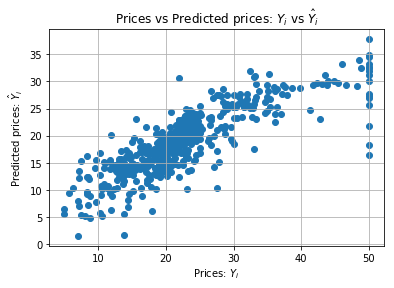

In [73]:
# r -> Learning rate (It has huge impact on the model)

# SGD for Linear Regression
def sgd(X_train,Y_train,weights,const,r=0.275,batch_size=10,iterations=100):
    n = batch_size
    count = 0
    for i in range(iterations):
        weights1 = weights
        const1 = const
        indices=np.random.choice(len(X_train),batch_size,replace=False) # Randomly picking the indices of length -> (batch_size)
        error = Y_train[indices] - (np.matmul(X_train[indices],weights) + const)
        weights = weights - r * (-2/n) * np.matmul((X_train[indices].T),error)
        const = const - r * (-2/n) * np.sum(error)
        r = r/2
        count = count + 1
        #if ((weights - weights1)/weights).all() < 0.001:
        if (weights == weights1).all() and (const == const1):
            #print(count)
            opt_w = weights
            opt_b = const
            break
    Y_pred=[]
    Y_pred = (np.matmul(X_train,opt_w) + opt_b) # Predicting the Y values 
    
    #Root Mean Square Error
    mse=mean_squared_error(Y_train,Y_pred)
    print("Root Mean Square Error: ",np.sqrt(mse))
    
    plt.scatter(Y_train, Y_pred)
    plt.xlabel("Prices: $Y_i$")
    plt.ylabel("Predicted prices: $\hat{Y}_i$")
    plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
    plt.grid()
    return opt_w,opt_b
            
       
            
opt_w,opt_b = sgd(X_train,Y_train,weights,const)   

### Weights and Intercept (SGD Manual)

In [103]:
# Manual SGD Weights and Intercept
# optimal weights vector
print("Weights of the features(w): ")
print(opt_w.reshape(1,13))
print("-----"*20)
print("Intercept(b): ")
print(opt_b)

Weights of the features(w): 
[[-0.71985524  1.21765836 -0.49207527  1.05570745 -0.86923362  2.11420622
  -0.80166073 -3.43273221  0.93485569 -2.09128809 -0.7527176  -0.47277887
  -2.26748459]]
----------------------------------------------------------------------------------------------------
Intercept(b): 
18.794112278703086


### R^2 Score (SGD Manual)

In [78]:
#R^2 Score: 

Y_pred = (np.matmul(X_train,opt_w) + opt_b)
r2 = r2_score(Y_train,Y_pred)
print("R^2 Score: ",r2)

R^2 Score:  0.49268178894831494


### SGDRegressor - SK-learn

Meas Square Error:  4.958594495774372
R^2 Score:  0.49268178894831494


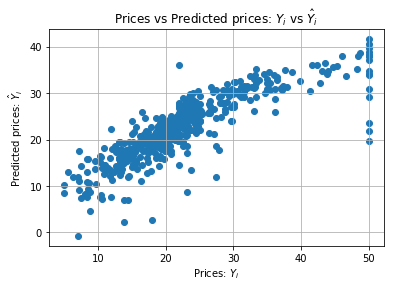

In [104]:
Y_tr = Y_train
clf = SGDRegressor(loss='squared_loss',max_iter=100,alpha=0.275,learning_rate='optimal')
clf.fit(X_train,Y_tr.ravel())
pred = clf.predict(X_train)

# Root mean square error
mse=mean_squared_error(Y_train,pred)
print("Meas Square Error: ",np.sqrt(mse))

# R^2 Score (Regression Score Function)
r2 = r2_score(Y_train,Y_pred)
print("R^2 Score: ",r2)

plt.scatter(Y_train, pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.grid()
            

### Weights and Intercept (SGD sk-learn)

In [105]:
# SGD Regressor coef_ (SK-learn)
print("Weights of the features: ")
print(clf.coef_)
print("-----"*20)
print("Intercept: ")
print(clf.intercept_)


Weights of the features: 
[-0.59342286  0.49038015 -0.54494969  0.74174568 -0.62238386  2.75241707
 -0.25328425 -1.37953411  0.28656961 -0.34435529 -1.53206784  0.75520557
 -2.74807131]
----------------------------------------------------------------------------------------------------
Intercept: 
[22.53324991]


### Conclusion:

In [106]:
x = PrettyTable()

x.field_names = ["Metric", "SGD (Manual)", "SGD (SK-learn)"]

x.add_row(["RMSE", 6.544278280064439, 4.958594495774372])
x.add_row(["R^2", 0.49268178894831494, 0.49268178894831494])

print(x)

+--------+---------------------+---------------------+
| Metric |     SGD (Manual)    |    SGD (SK-learn)   |
+--------+---------------------+---------------------+
|  RMSE  |  6.544278280064439  |  4.958594495774372  |
|  R^2   | 0.49268178894831494 | 0.49268178894831494 |
+--------+---------------------+---------------------+
